In [1]:
import matplotlib
%matplotlib inline

import numpy as np, matplotlib as mpl
import PreFRBLE
from PreFRBLE.convenience import *
from PreFRBLE.plot import *
from PreFRBLE.likelihood import *
from PreFRBLE.physics import *


In [2]:
redshift_estimates = GetEstimatedRedshifts()

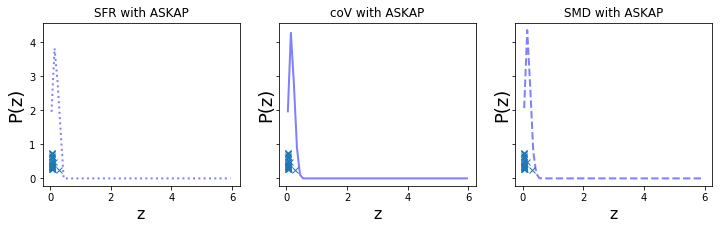

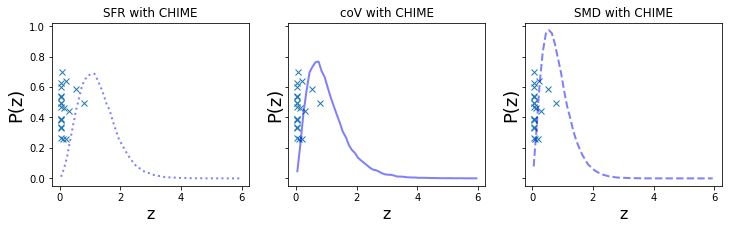

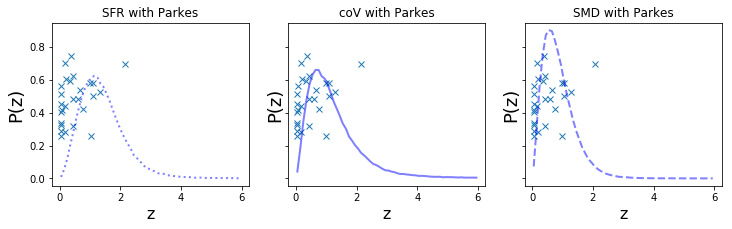

In [16]:
### see how well the obtained redshifts compare to assumed population
### compare shape of likelihood function and compute Bayes factor

FRBs = GetFRBcat(telescopes=telescopes)

likelihoods = np.zeros( redshift_estimates.shape )


for tele in telescopes:
    ix_tele, = np.where( FRBs['tele'] == telescopes_FRBcat[tele] )
#    fig, ax = plt.subplots()
#    ax.set_title( tele ) #"%s with %s" % (pop, tele) )
#    ax.plot( redshift_estimates[ix_tele,-2], 0.75-0.5*np.random.rand(len(ix_tele)), marker='x', linestyle=' ' )

    fig, axs = plt.subplots(1,3,figsize=(12,3), sharey=True)
    y_FRBs = 0.75-0.5*np.random.rand(len(ix_tele))
    
#    for ipop, (pop, linestyle) in enumerate(zip(populations, linestyles_population)):

    for ipop, (pop, linestyle, ax) in enumerate(zip(populations, linestyles_population, axs)):

        ax.set_title( "%s with %s" % (pop, tele) )
        ax.plot( redshift_estimates[ix_tele,ipop], y_FRBs, marker='x', linestyle=' ' )

##        P, x = histogram( redshift_estimates[ix_tele,ipop], bins=60, range=(0,6), log=False, density=True )
##        PlotLikelihood( x=x, P=P, log=False, measure='z', ax=ax, linestyle=linestyle, label=pop, color='black' )
        P, x = GetLikelihood_Redshift( population=pop, telescope=tele )
        PlotLikelihood( x=x, P=P, log=False, label=pop, measure='z', ax=ax, linestyle=linestyle, linewidth=2, alpha=0.5, color='blue' )
    
        likelihoods[ix_tele,ipop] = Likelihoods( measurements=redshift_estimates[ix_tele,ipop], P=P, x=x )
#    ax.legend()
plt.show()

        
likelihoods /= likelihoods[:,0].repeat( likelihoods.shape[1] ).reshape( *likelihoods.shape )

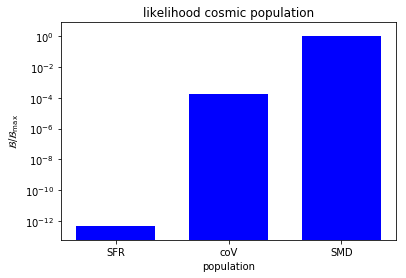

In [4]:
bayes = np.prod( likelihoods[ (redshift_estimates[:,0]<0.5)*(redshift_estimates[:,0]>0.05)  ], axis=0 )

PlotBayes( x=populations, y=bayes, width=0.7, label='population', title='likelihood cosmic population' )

plt.show()

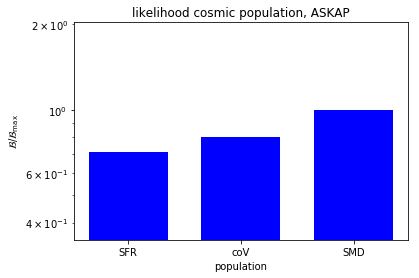

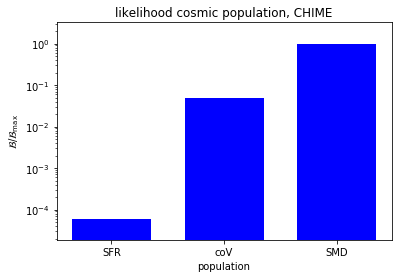

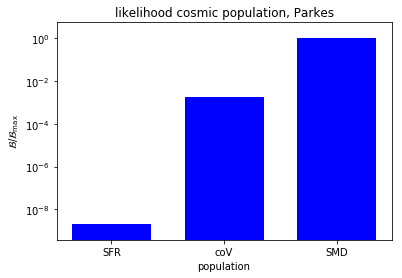

In [12]:
for tele in telescopes:
    ix_tele, = np.where( FRBs['tele'] == telescopes_FRBcat[tele] )
    ls = likelihoods[ix_tele]
    bayes = np.prod( ls[ (redshift_estimates[ix_tele,0]<4.5)*(redshift_estimates[ix_tele,0]>0.05)  ], axis=0 )
#    bayes = np.prod( likelihoods[ (redshift_estimates[:,0]<4.5)*(redshift_estimates[:,0]>0.05)  ], axis=0 )
    PlotBayes( x=populations, y=bayes, width=0.7, label='population', title='likelihood cosmic population, %s' % tele )

    plt.show()